In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection

## 1. Import and warehouse data:

>• Import all the given datasets and explore shape and size of each.

In [2]:
x = pd.read_csv('C:/Users/shahs/Desktop/Part1 - Normal.csv')

In [3]:
y = pd.read_csv('C:/Users/shahs/Desktop/Part1 - Type_S.csv')

In [4]:
z = pd.read_csv('C:/Users/shahs/Desktop/Part1 - Type_H.csv')

In [5]:
x.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [6]:
y.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [7]:
z.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [8]:
x.shape

(100, 7)

In [9]:
y.shape

(150, 7)

In [10]:
z.shape

(60, 7)

> • Merge all datasets onto one and explore final shape and size.

In [11]:
data = x.append([y,z])

In [12]:
data.shape

(310, 7)

In [13]:
data.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


## 2. Data cleansing:

> • Explore and if required correct the datatypes of each attribute

In [14]:
data.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [15]:
data.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

## 3. Data analysis & visualisation:

> • Perform detailed statistical analysis on the data.

In [16]:
data.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


>> In all the columns the Mean and Median are almost near to the same.

>> In P_incidence,P_tilt,L_angle,S_slope,P_radius and S_Degree all the distribution are near to be normal.

>> In P_tilt it also contain negative values and in there might be skewness because of the larger difference between 75% and max values.

>> In L_angle and S_Degree there might be outliers.


> • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis. 

# UNIVARIATE ANALYSIS

> Analysis on P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree

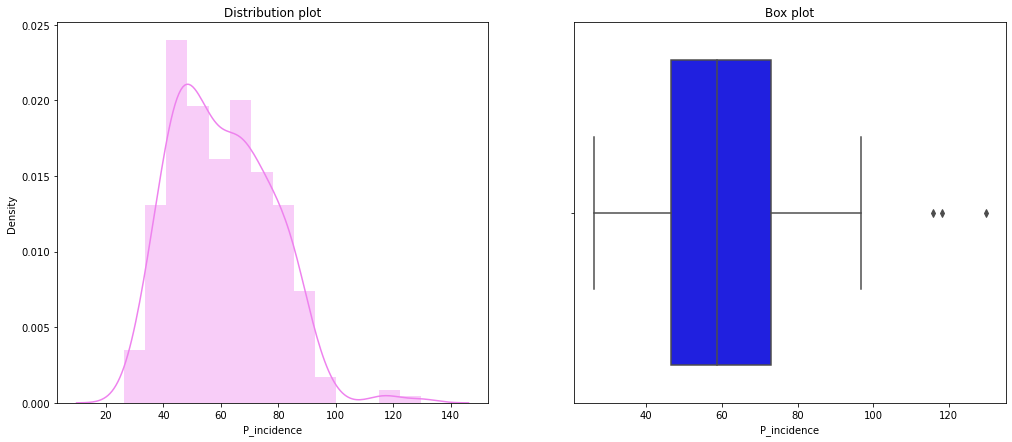

outliers in P_incidence: 3


In [17]:
IN, ax= plt.subplots(1, 2, figsize=(17,7))
sns.distplot(data['P_incidence'],  ax=ax[0],color='violet')
sns.boxplot(x = 'P_incidence', data=data,  orient='h' , ax=ax[1],color='blue')
ax[0].set_title('Distribution plot')
ax[1].set_title('Box plot')
plt.show()
q3=np.percentile(data['P_incidence'],75)
q1=np.percentile(data['P_incidence'],25)
IQR=q3-q1
threshold=IQR*1.5
upper=q3+threshold
lower=q1-threshold
Outliers=[i for i in data['P_incidence'] 
          if i < lower or i > upper]
print('outliers in P_incidence:',len(Outliers))

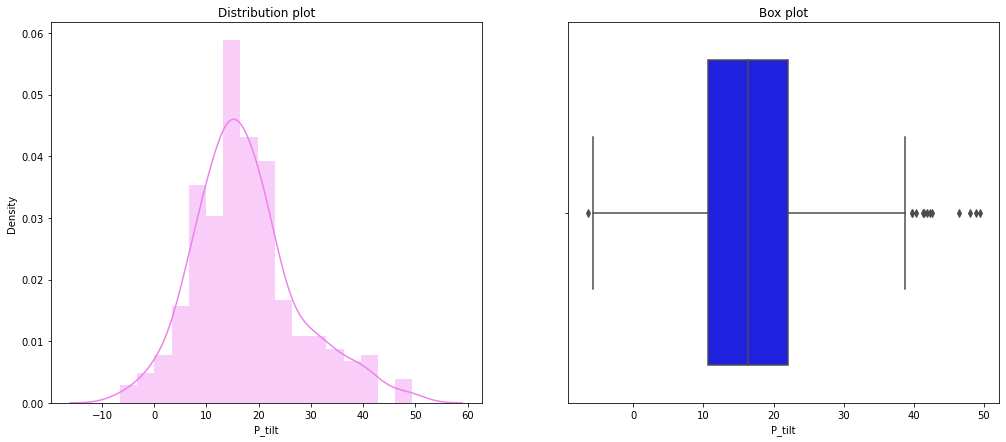

outliers in P_tilt: 13


In [18]:
TI, ax= plt.subplots(1, 2, figsize=(17,7))
sns.distplot(data['P_tilt'],  ax=ax[0],color='violet')
sns.boxplot(x = 'P_tilt', data=data,  orient='h' , ax=ax[1],color='blue')
ax[0].set_title('Distribution plot')
ax[1].set_title('Box plot')
plt.show()
q3=np.percentile(data['P_tilt'],75)
q1=np.percentile(data['P_tilt'],25)
IQR=q3-q1
threshold=IQR*1.5
upper=q3+threshold
lower=q1-threshold
Outliers=[i for i in data['P_tilt'] 
          if i < lower or i > upper]
print('outliers in P_tilt:',len(Outliers))

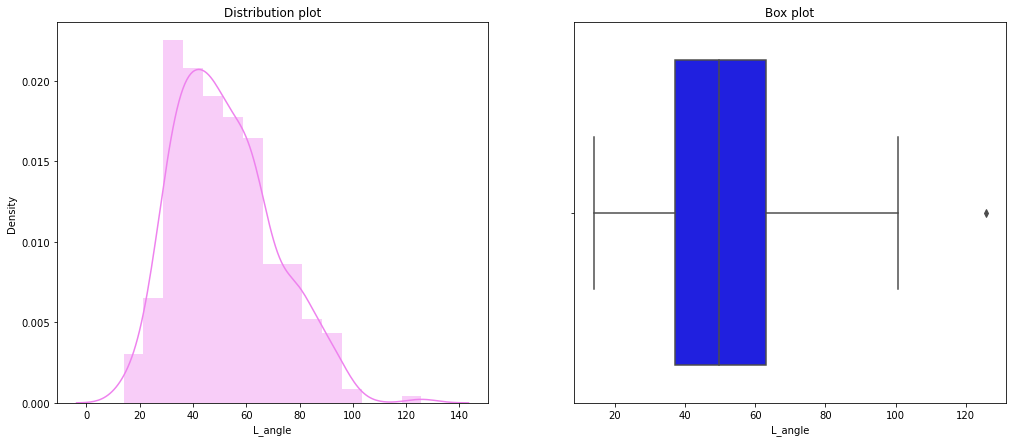

outliers in L_angle: 1


In [19]:
L, ax= plt.subplots(1, 2, figsize=(17,7))
sns.distplot(data['L_angle'],  ax=ax[0],color='violet')
sns.boxplot(x = 'L_angle', data=data,  orient='h' , ax=ax[1],color='blue')
ax[0].set_title('Distribution plot')
ax[1].set_title('Box plot')
plt.show()
q3=np.percentile(data['L_angle'],75)
q1=np.percentile(data['L_angle'],25)
IQR=q3-q1
threshold=IQR*1.5
upper=q3+threshold
lower=q1-threshold
Outliers=[i for i in data['L_angle'] 
          if i < lower or i > upper]
print('outliers in L_angle:',len(Outliers))

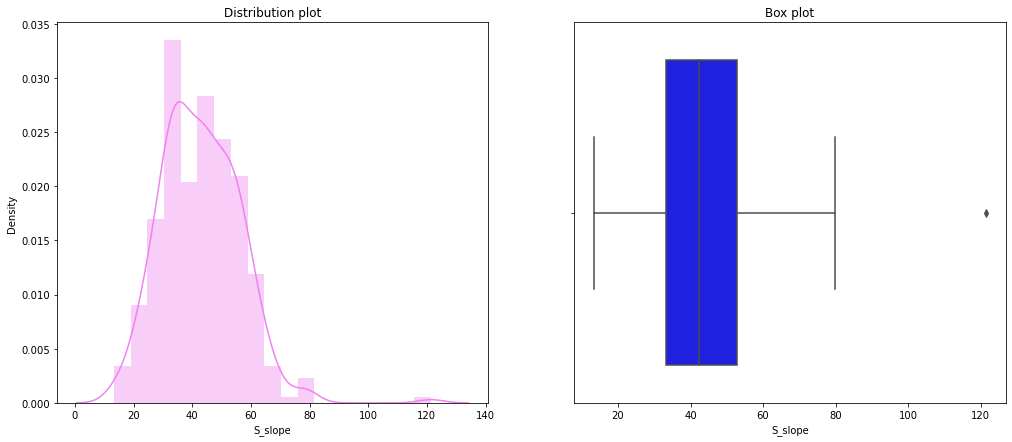

outliers in S_slope: 1


In [20]:
S, ax= plt.subplots(1, 2, figsize=(17,7))
sns.distplot(data['S_slope'],  ax=ax[0],color='violet')
sns.boxplot(x = 'S_slope', data=data,  orient='h' , ax=ax[1],color='blue')
ax[0].set_title('Distribution plot')
ax[1].set_title('Box plot')
plt.show()
q3=np.percentile(data['S_slope'],75)
q1=np.percentile(data['S_slope'],25)
IQR=q3-q1
threshold=IQR*1.5
upper=q3+threshold
lower=q1-threshold
Outliers=[i for i in data['S_slope'] 
          if i < lower or i > upper]
print('outliers in S_slope:',len(Outliers))

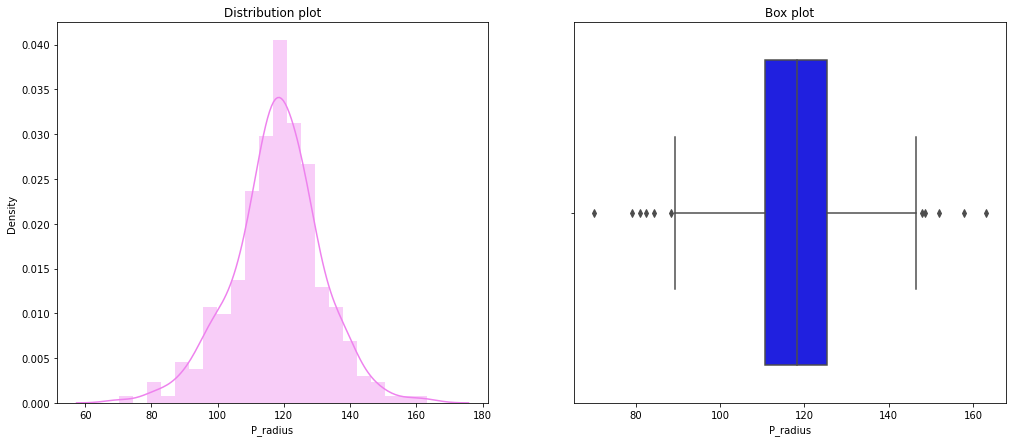

outliers in P_radius: 11


In [21]:
PR, ax= plt.subplots(1, 2, figsize=(17,7))
sns.distplot(data['P_radius'],  ax=ax[0],color='violet')
sns.boxplot(x = 'P_radius', data=data,  orient='h' , ax=ax[1],color='blue')
ax[0].set_title('Distribution plot')
ax[1].set_title('Box plot')
plt.show()
q3=np.percentile(data['P_radius'],75)
q1=np.percentile(data['P_radius'],25)
IQR=q3-q1
threshold=IQR*1.5
upper=q3+threshold
lower=q1-threshold
Outliers=[i for i in data['P_radius'] 
          if i < lower or i > upper]
print('outliers in P_radius:',len(Outliers))

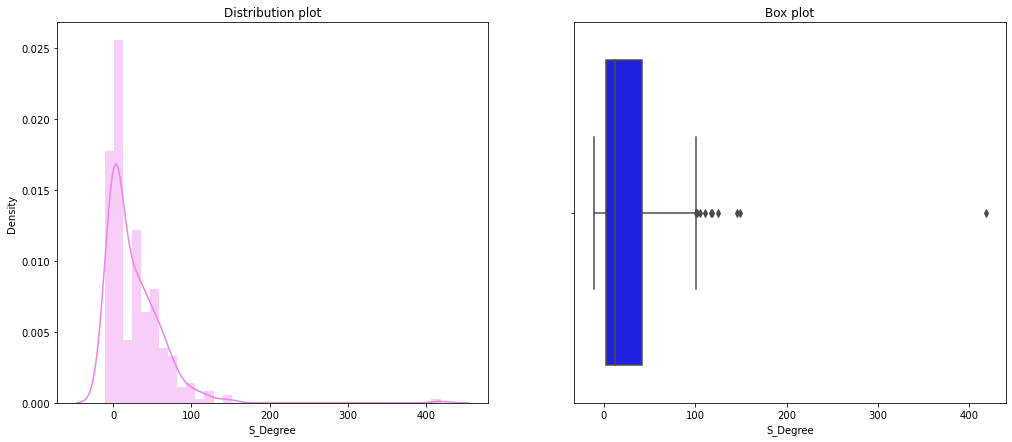

outliers in S_Degree: 10


In [22]:
SD, ax= plt.subplots(1, 2, figsize=(17,7))
sns.distplot(data['S_Degree'],  ax=ax[0],color='violet')
sns.boxplot(x = 'S_Degree', data=data,  orient='h' , ax=ax[1],color='blue')
ax[0].set_title('Distribution plot')
ax[1].set_title('Box plot')
plt.show()
q3=np.percentile(data['S_Degree'],75)
q1=np.percentile(data['S_Degree'],25)
IQR=q3-q1
threshold=IQR*1.5
upper=q3+threshold
lower=q1-threshold
Outliers=[i for i in data['S_Degree'] 
          if i < lower or i > upper]
print('outliers in S_Degree:',len(Outliers))

> The above analysis which we have predicted by seeing only through described data is almost near to the true by comparing through univariate analysis

# BIVARIATE ANALYSIS

In [23]:
data['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

In [24]:
data.loc[data['Class']=='Nrmal','Class']='Normal'
data.loc[data['Class']=='type_h','Class']='Type_H'
data.loc[data['Class']=='tp_s','Class']='Type_S'

<Figure size 720x360 with 0 Axes>

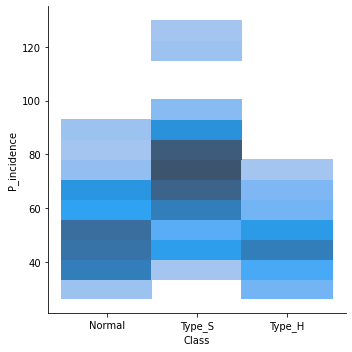

In [25]:
#P_incidence
plt.figure(figsize=(10,5))
sns.displot(x='Class', y='P_incidence', data= data)
plt.show()

> Here Type_S class has larger value

<Figure size 720x360 with 0 Axes>

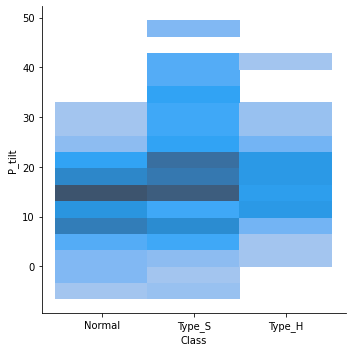

In [26]:
#P_tilt
plt.figure(figsize=(10,5))
sns.displot(x='Class', y='P_tilt', data= data)
plt.show()

> Here also Type_S class has larger values

<Figure size 720x360 with 0 Axes>

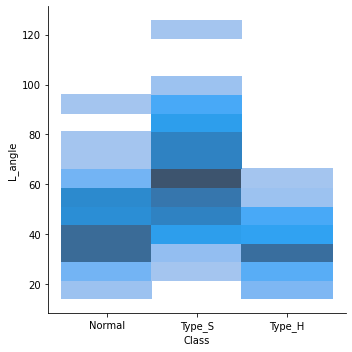

In [27]:
#L_angle
plt.figure(figsize=(10,5))
sns.displot(x='Class', y='L_angle', data= data)
plt.show()

> Here also Type_S class has larger values

<Figure size 720x360 with 0 Axes>

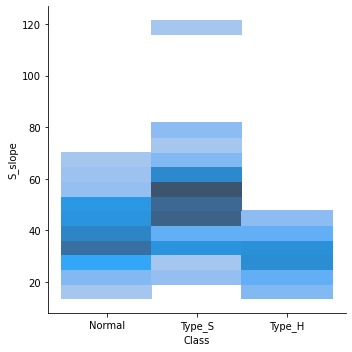

In [28]:
#S_slope
plt.figure(figsize=(10,5))
sns.displot(x='Class', y='S_slope', data= data)
plt.show()

> Here Type_S class has higher values and greater outliers.

<Figure size 720x360 with 0 Axes>

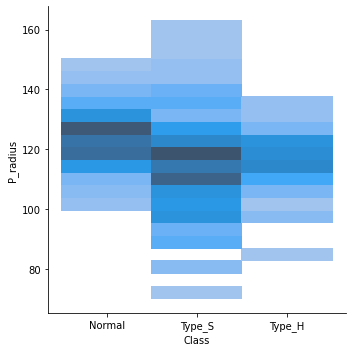

In [29]:
#P_radius
plt.figure(figsize=(10,5))
sns.displot(x='Class', y='P_radius', data= data)
plt.show()

<Figure size 720x360 with 0 Axes>

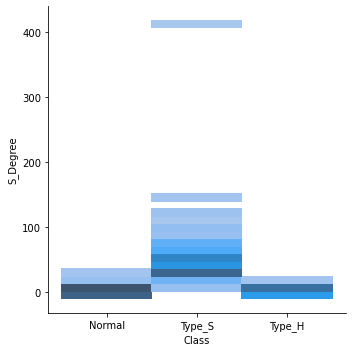

In [30]:
#S_Degree
plt.figure(figsize=(10,5))
sns.displot(x='Class', y='S_Degree', data= data)
plt.show()

> Here Type_S class has highest ouliers than compare to both

## MULTIVARIATE ANALYSIS

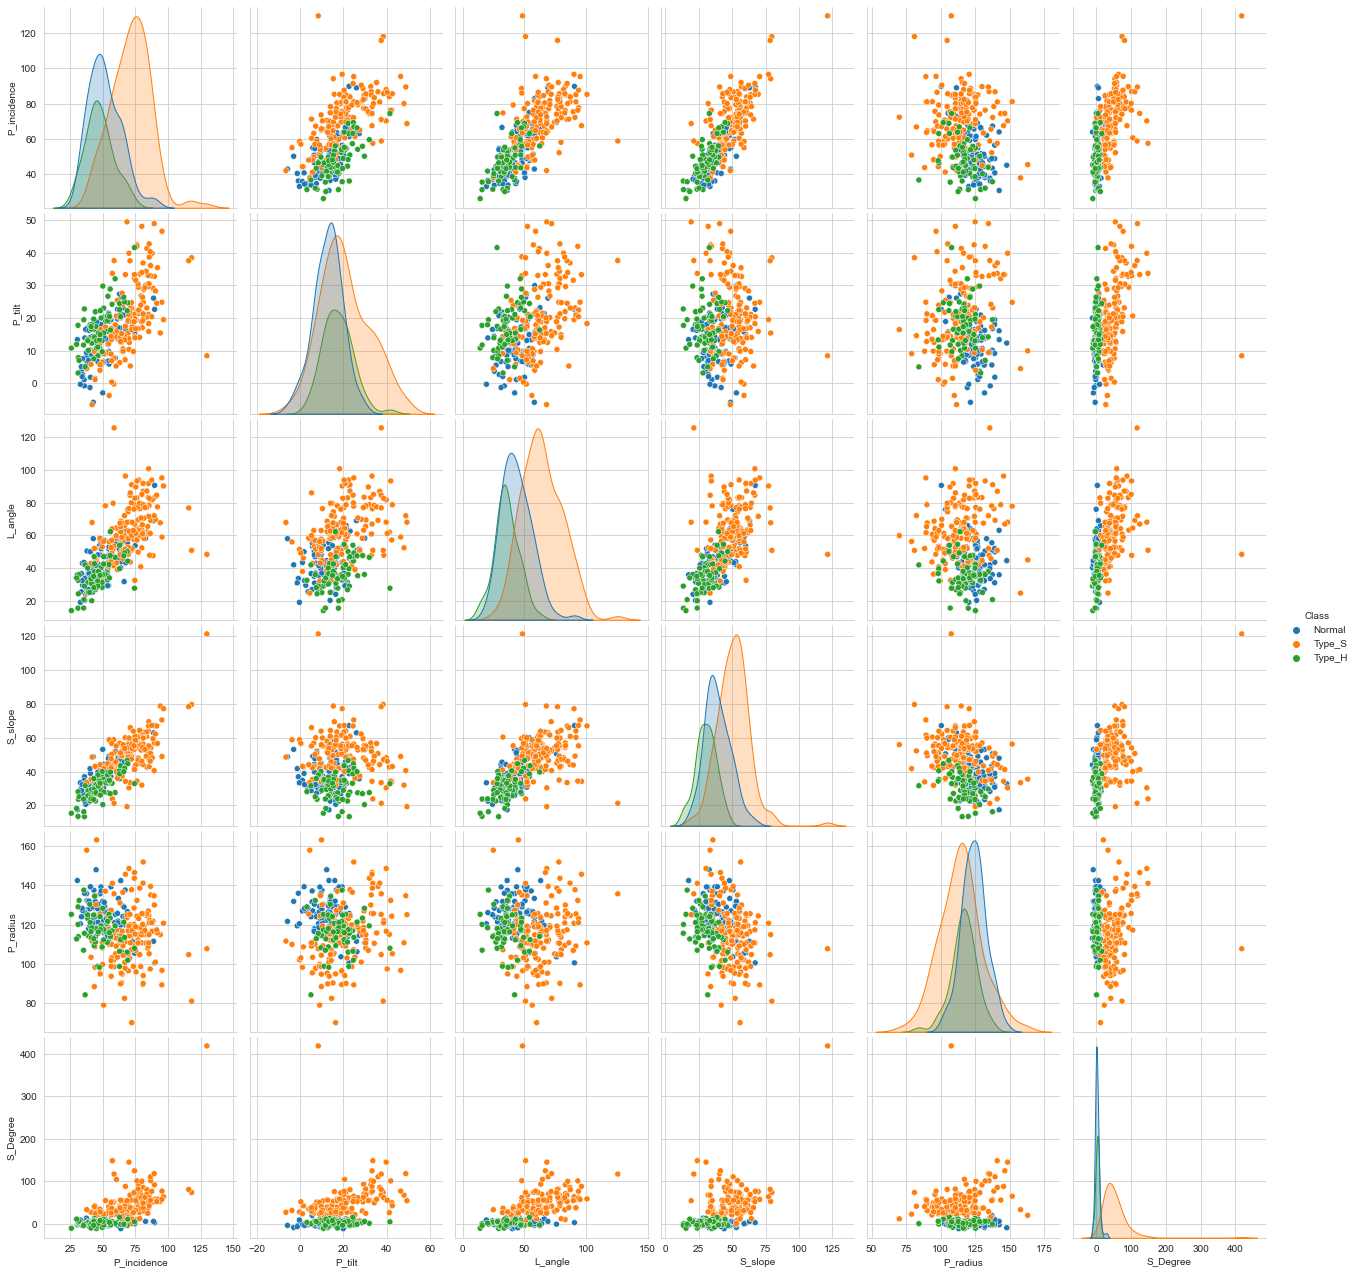

In [31]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="Class", size=3);
plt.show()

> P_incidence has postive realtionship.
> P_tilt has no Relationship with s_slope and p_radius.
> L_angle has postive Relationship with p_tilt,s_slope and s_degree.
> s_slope has positive Relationship with L_angle and s_degree.
> p_radius has no Relationship with s_degree,p_tilt,l_angle.
> S_degree has no strong positive Relationship with any of the variables. 

In [32]:
class_s=data.groupby('Class')
class_s.mean().reset_index()

,Class,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
1,Type_H,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
2,Type_S,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


## 4. Data pre-processing:

> • Segregate predictors vs target attributes

> In the above analysis we have there somewhat outliers which we can fix so we can impute outliers with the mean values.

In [33]:
col=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for c in col:
    q25,q75=np.percentile(data[c],25),np.percentile(data[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in data[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    data_include = data.loc[(data[c] >= lower) & (data[c] <= upper)]
    mean=int(data_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    data[c]=np.where(data[c]>upper,mean,data[c])
    data[c]=np.where(data[c]<lower,mean,data[c])
    Outliers=[i for i in data[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in P_incidence Before Imputing : 3


 Mean of P_incidence is 59


 Total Number of outliers in P_incidence After Imputing : 0


 Total Number of outliers in P_tilt Before Imputing : 13


 Mean of P_tilt is 16


 Total Number of outliers in P_tilt After Imputing : 0


 Total Number of outliers in L_angle Before Imputing : 1


 Mean of L_angle is 51


 Total Number of outliers in L_angle After Imputing : 0


 Total Number of outliers in S_slope Before Imputing : 1


 Mean of S_slope is 42


 Total Number of outliers in S_slope After Imputing : 0


 Total Number of outliers in P_radius Before Imputing : 11


 Mean of P_radius is 118


 Total Number of outliers in P_radius After Imputing : 0


 Total Number of outliers in S_Degree Before Imputing : 10


 Mean of S_Degree is 22


 Total Number of outliers in S_Degree After Imputing : 0




> • Check for target balancing. Add your comments.

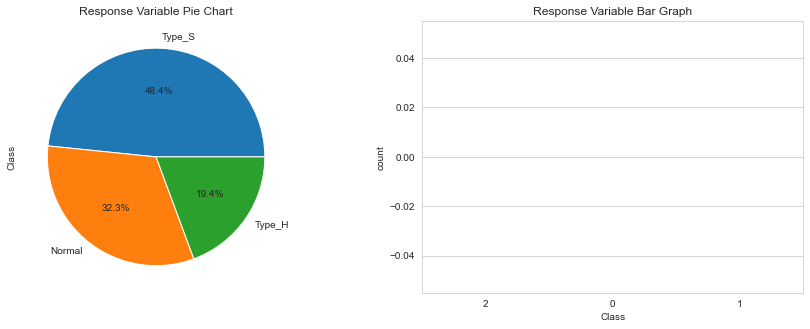

In [34]:
f,axes=plt.subplots(1,2,figsize=(15,5))
data['Class'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Class',data=data,ax=axes[1],order=[2,0,1])
axes[0].set_title('Response Variable Pie Chart')
axes[1].set_title('Response Variable Bar Graph')
plt.show()

> Comment :
> There is an imbalanced target which means we can not a proper model.Most of it is occupied by Type_S class.

> • Perform train-test split.

In [35]:
X=data.drop(columns='Class')
y=data['Class'] 

In [36]:
X.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,59.893743,16.548519,51.689825,42.697607,118.061242,22.193516
std,16.139975,8.404101,18.071145,12.656481,11.342178,25.230932
min,26.147921,-5.845994,14.000000,13.366931,89.307547,-11.058179
25%,46.430294,10.705427,37.000000,33.347122,111.295804,1.603727
50%,58.691038,16.000000,49.562398,42.349084,118.000000,11.767934
75%,72.313279,21.021167,62.964777,52.475365,125.196027,38.144544
max,96.657315,38.750670,100.744220,79.695154,146.466001,100.292107


In [37]:
X_Scaled=X.apply(zscore)

In [38]:
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,-5.192979e-17,1.001617,-2.094203,-0.835517,-0.074638,0.770733,2.281479
P_tilt,310.0,7.807375e-17,1.001617,-2.669021,-0.696391,-0.065374,0.533059,2.646095
L_angle,310.0,-3.344995e-16,1.001617,-2.089008,-0.814203,-0.117915,0.624929,2.718904
S_slope,310.0,-1.955425e-16,1.001617,-2.321190,-0.739985,-0.027582,0.773799,2.927936
P_radius,310.0,-1.002424e-15,1.001617,-2.539211,-0.597449,-0.005408,0.630066,2.508397
S_Degree,310.0,-2.012727e-16,1.001617,-1.320025,-0.817373,-0.413874,0.633223,3.100356


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

# 5. Model training, testing and tuning:

> • Design and train a KNN classifier.

In [40]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' ) 
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

> • Display the classification accuracies for train and test data.

In [41]:
print('Accuracy on Training data:',KNN.score(X_train, y_train))

Accuracy on Training data: 0.9032258064516129


In [42]:
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Test data: 0.7956989247311828


> • Display and explain the classification report in detail.

In [43]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.70      0.57      0.63        28
      Type_H       0.50      0.61      0.55        18
      Type_S       0.98      1.00      0.99        47

    accuracy                           0.80        93
   macro avg       0.72      0.73      0.72        93
weighted avg       0.80      0.80      0.80        93



# comments
>  class Normal : 70%

>  class Type_H : 50%
    
>  class Type_S : 98%

>  f1-score has maximum value for Type _S.

> • Automate the task of finding best values of K for KNN.

In [44]:
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

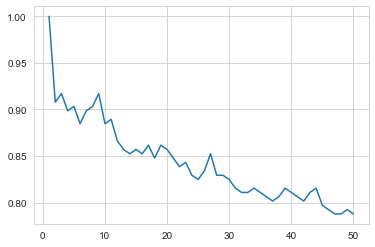

In [45]:
plt.plot(range(1,51),train_score)
plt.show()

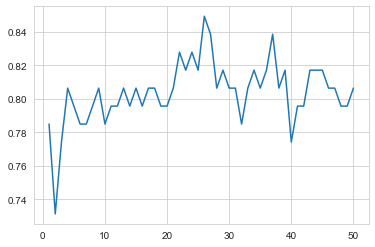

In [46]:
plt.plot(range(1,51),test_score)
plt.show()

In [47]:
k=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.7849462365591398:
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.67      0.57      0.62        28
      Type_H       0.57      0.72      0.63        18
      Type_S       0.96      0.94      0.95        47

    accuracy                           0.78        93
   macro avg       0.73      0.74      0.73        93
weighted avg       0.79      0.78      0.79        93

Accuracy on Training data for k 2 is 0.9078341013824884:
Accuracy on Test data for k 2 is 0.7311827956989247:
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.54      0.71      0.62        28
      Type_H       0.43      0.33      0.38        18
      Type_S       1.00      0.89      0.94        47

    accuracy                           0.73        93
   macro avg       0.66      0.65      0.64        93
weighted avg       0.75      0.73     

> k13 and k15 have best testing error

In [48]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()
svc_model_linear = SVC(kernel='linear',C=1,gamma=.6)
svc_model_rbf = SVC(kernel='rbf',degree=2,C=.009)
svc_model_poly  = SVC(kernel='poly',degree=2,gamma=0.1,C=.01)

LR: 0.806452 (0.040804)
KNN: 0.829032 (0.062965)
NB: 0.825806 (0.073842)
SVM-linear: 0.841935 (0.089454)
SVM-poly: 0.829032 (0.077755)
SVM-rbf: 0.483871 (0.108916)


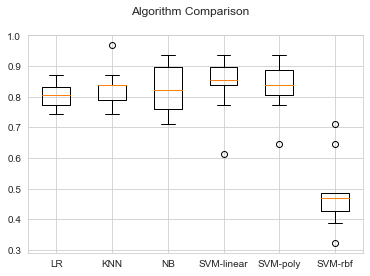

In [49]:
seed = 7
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

> SVM-linear is better Algo in this dataset it has high accuracy and less std deviation.

LR: 0.851613 (0.059830)
KNN: 0.806452 (0.064516)
NB: 0.825806 (0.073842)
SVM-linear: 0.841935 (0.083436)
SVM-poly: 0.483871 (0.108916)
SVM-rbf: 0.483871 (0.108916)


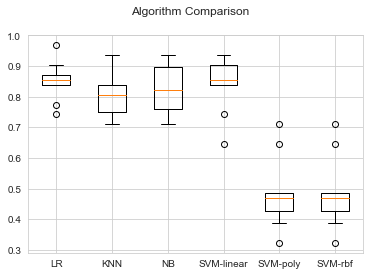

In [50]:
seed = 7
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model,X_Scaled,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

> 85% of accuracy has the logistics regression.

## 6. Conclusion and improvisation:

> • Write your conclusion on the results.

> • Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points
collected by the research team to perform a better data analysis in future.

In [51]:
# KNN is the final model we can because of its accuracy as compared to others.All variables the distribution is normal.
# k=13 and k=15 have best test and train error and because of the medical domain there should be description for each and every variables for better understanding of the part from which we are working and what we are supposed to work.